In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
import time

-0.04259264740541418


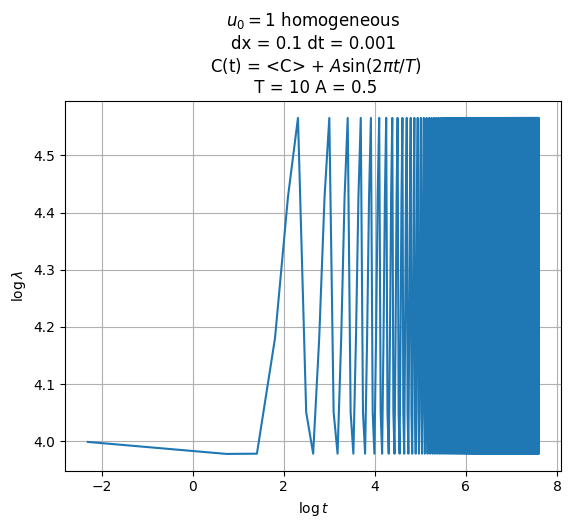

In [5]:
f = open("../fileq2Aveout.dat", "r")
N = 1000000000
tmin = 2
tmax = 7
t = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    t[i] = np.log(float(a))
    y[i] = np.log(2*np.pi/np.sqrt(float(b)))
    i = i + 1
t = t[0:i]
y = y[0:i]

fig, ax = plt.subplots()
ax.plot(t, y)
imin = 50
imax = 100
c = np.polyfit(t[imin:imax-1], y[imin:imax-1], 1)
#ax.plot(t[imin:imax-1], t[imin:imax-1]*c[0] + np.ones(len(t[imin:imax-1]))*c[1])

#plt.loglog(x[ts], np.abs(y[ts]),'.-')

ax.set_xlabel("$\log t$")
ax.set_ylabel("$\log\lambda$")
ax.grid()
ax.set_title(title)

print(c[0])

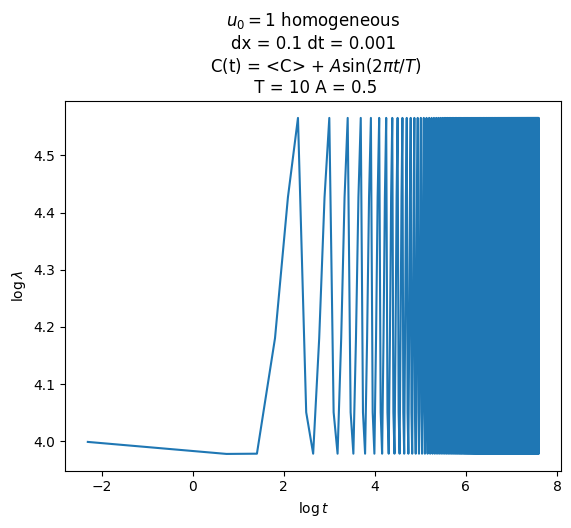

In [6]:
ax.grid(0)
fig

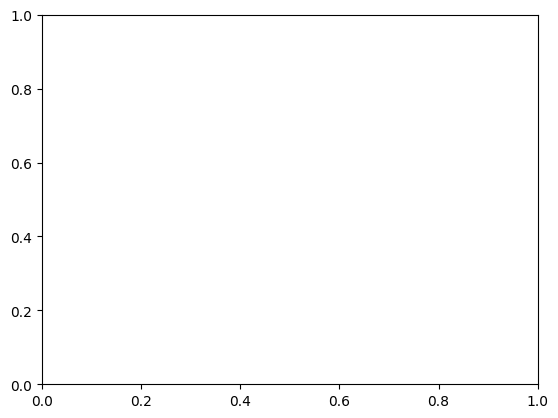

In [7]:
fig1, ax1 = plt.subplots()

-0.04259264740541418


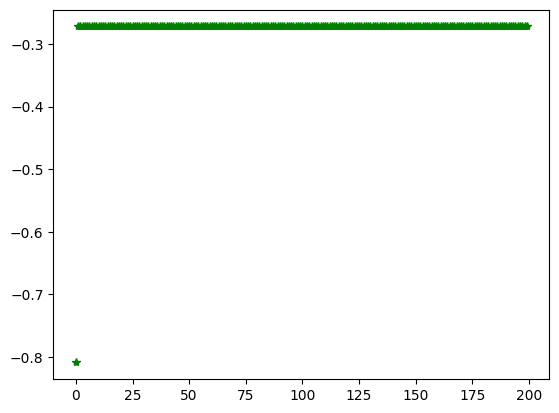

In [8]:
f = open("../fileAveout.dat", "r")
N = 1000000000
tmin = 2
tmax = 7
t = np.zeros(N)
y = np.zeros(N)
i = 0
T=10
for row in f:
    a, b = row.split(" ")
    if float(a) > i*T:
        t[i] = float(a)
        y[i] = float(b)
        i = i + 1
t = t[0:i]
y = y[0:i]

ax1.plot(t/T, y,"*", label = "$Cranck-Nicholson$",color="green")

#ax1.set_ylim(0.05, 1.5)

print(c[0])
fig1

/tmp/ipykernel_31424/1330313880.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax1.set_yscale("log")


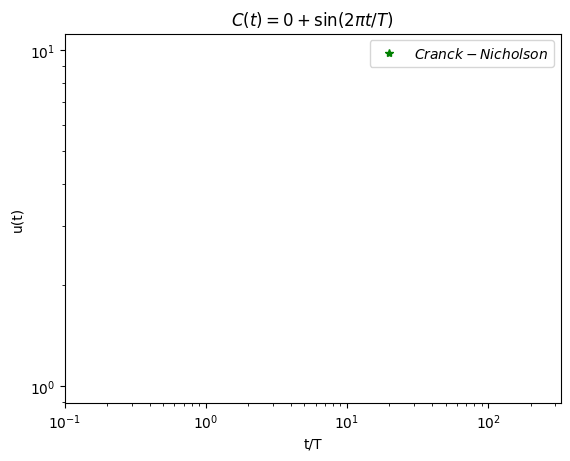

In [9]:
ax1.set_xlabel("t/T")
ax1.set_ylabel("u(t)")
ax1.set_title("$C(t) = 0 + \sin(2\pi t/T)$")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(0.1)
ax1.legend()
fig1

-0.04259264740541418


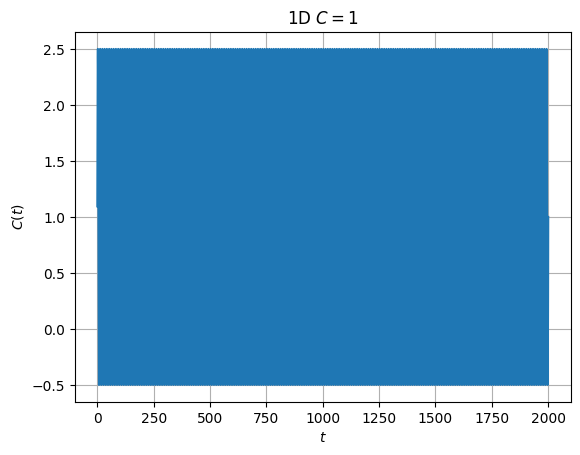

In [10]:
f = open("../fileCout.dat", "r")
N = 1000000000
t = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    t[i] = float(a)
    y[i] = float(b)
    i = i + 1
t = t[0:i]
y = y[0:i]

fig, ax = plt.subplots()
ax.plot(t, y)

ax.set_xlabel("$t$")
ax.set_ylabel("$C(t)$")
ax.grid()
ax.set_title("1D $C=1$")

print(c[0])

# Plot final state u(x, tmax)

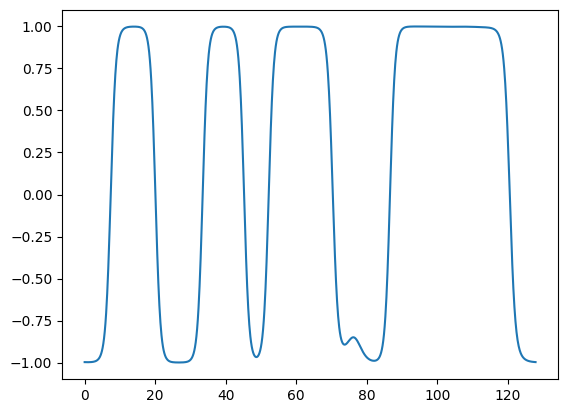

In [9]:
f = open("../tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        #a, b = row.split("	")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
        N = int(N)

    i = i + 1

x = x[0:i-1]
y = y[0:i-1]

# For numerical solution
#x = (x + 4*np.ones(N))/8*100
#y = -y

T = 2*float(Thalf)

#eps = 0.5

fig, ax = plt.subplots()
ax.plot(x[0:i-1], y[0:i-1],"-",ms="10",label="data")
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
state_time = float(tmax) - 10
label = label + "\n t = " + str(state_time)
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

#ax.set_ylim(-1.1, 1.1)
#ax.axhline(0, color="black")
#ax.axvline(204.8/2, color="black")
#ax.axis("off")

#ax.set_xlim(230,250)
#ax.plot(x, -np.tanh((x-np.ones(len(x))*78.55)/np.sqrt(2)),"--",label="-$tanh(x/\sqrt{2})$")
#ax.legend()
#ax.axvline(248,color="black")

# Plot marker at midpoint between kinks
#ax.plot(x[int(0.75*N)], y[int(0.75*N)], "*", color="black")
#ax.set_xlim(x[int(0.7*N)], x[int(0.8*N)])
#ax.set_ylim(y[int(0.75*N)]-0.002, y[int(0.75*N)] + 0.002)

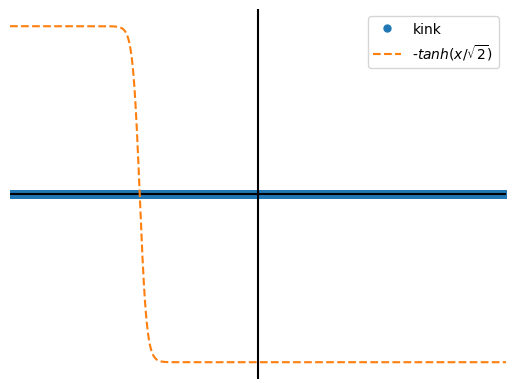

In [12]:
f = open("../uxx.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        #a, b = row.split("	")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
        N = int(N)

    i = i + 1

x = x[0:i-1]
y = y[0:i-1]

# For numerical solution
#x = (x + 4*np.ones(N))/8*100
#y = -y

T = 2*float(Thalf)

#eps = 0.5

fig, ax = plt.subplots()
ax.plot(x[0:i-1], y[0:i-1],".",ms="10",label="kink")
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
state_time = float(tmax) - 10
label = label + "\n t = " + str(state_time)
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

ax.set_ylim(-1.1, 1.1)
ax.axhline(0, color="black")
ax.axvline(204.8/2, color="black")
ax.axis("off")

ax.set_xlim(204.8/2-50,204.8/2+50)
ax.plot(x, -np.tanh((x-np.ones(len(x))*78.55)/np.sqrt(2)),"--",label="-$tanh(x/\sqrt{2})$")
ax.legend()
#ax.axvline(78.55)

# Plot marker at midpoint between kinks
#ax.plot(x[int(0.75*N)], y[int(0.75*N)], "*", color="black")
#ax.set_xlim(x[int(0.7*N)], x[int(0.8*N)])
#ax.set_ylim(y[int(0.75*N)]-0.002, y[int(0.75*N)] + 0.002)

In [13]:
x[len(x)-1]

204.7

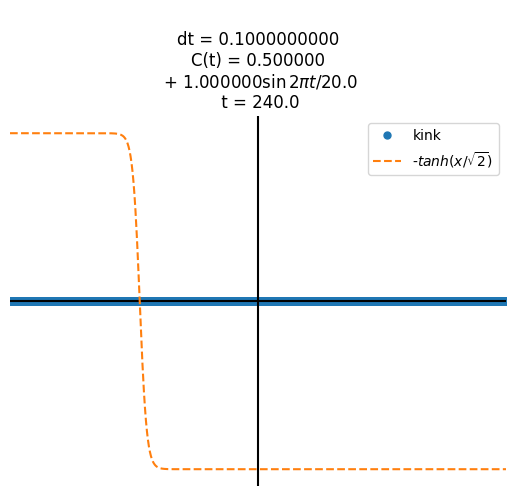

In [14]:
ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
eps = 0.5
#ax.set_ylim(-np.sqrt(float(Cave))-eps,np.sqrt(float(Cave))+eps)
#ax.set_xlim(5,95)

#ax.plot(np.linspace(0,100,5), np.zeros(5), linestyle = "dashed", color = "black")
#ax.set_axis_off()
fig
#plt.grid()

# Tail shape

In [15]:
# Check kink's tail shape

#fig_, ax_ = plt.subplots()
ax_.set_xlabel("(x-xc)^2, x > xc")
ax_.set_ylabel("1-u(x,t)/beta(t)")
ax_.set_title("Tail of the kink @ t = "+str(state_time)+" and C(t) decaying\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")

N = int(N)
beta = y[N-int(N/4)]
x2 = np.zeros(N)
for i in np.arange(0,N):
    x2[i] = np.sign(x[i]-x[int(N/2)])*(x[i]-x[int(N/2)])**2

curve_label = "t = " + str(state_time)
#curve_label = "NDSolve u_k ODE w/ critical velocity"
ax_.plot(x2[0:i-1], (np.ones(N-2)-y[0:i-1]/beta), label = curve_label)
ax_.set_yscale("log")

xc = 0
width = 3
plotlenght = 22

ax_.set_xlim((xc)**2,(xc+width+plotlenght)**2)
#ax_.legend(loc="bottom left")
#plt.ylim(10**(-3),10**(-1))
fig_

NameError: name 'ax_' is not defined

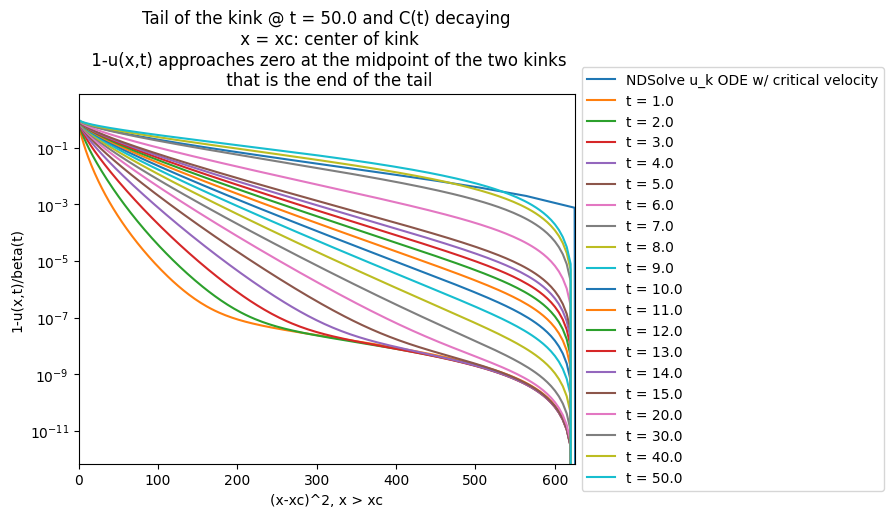

In [ ]:
ax_.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig_

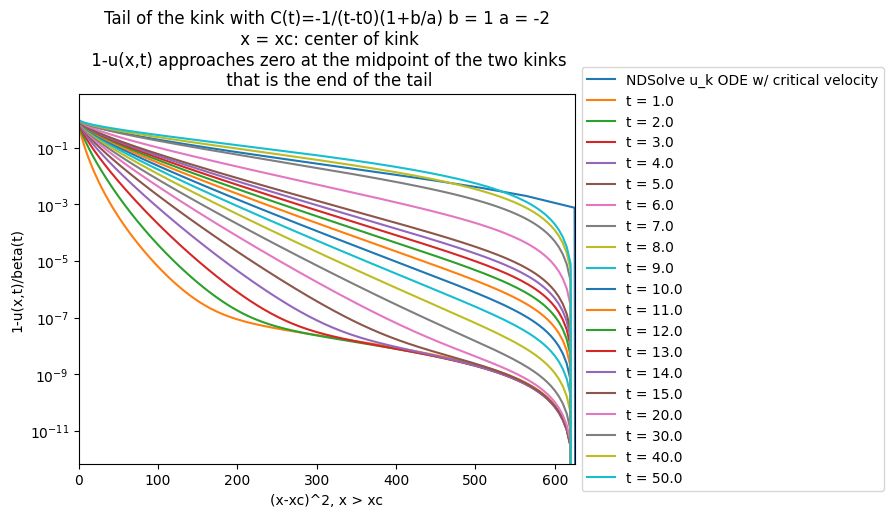

In [ ]:
ax_.set_title("Tail of the kink with C(t)=-1/(t-t0)(1+b/a) b = 1 a = -2\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")
fig_

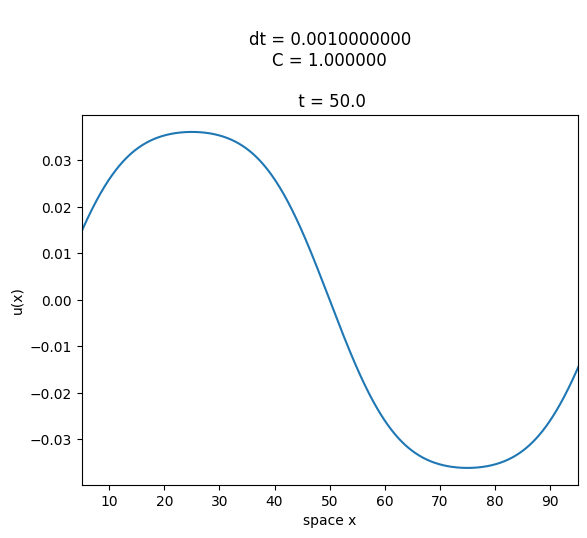

In [ ]:
fig